# Multivariate Data Sets

---
> Erick Eduardo Aguilar Hernández:
> * mat.ErickAguilar@gmail.com.mx
> * isc.ErickAguilar@gmail.com

---
Multivariate analysis is the branch of statistics that generalizes methods of inferential statistics, so that a population $X$ can be characterized through a finite collection of random variables $X_i$. i.e multivariated distribution of random vectors. E.j. a species of animals can be characterized through quantitative and qualitative variables as they are high body, body width, weight, head high, head width, leg size, hair color, eye color, sex, etc. this variables are called explicatives.

$$ \vec{X} = (X_1,X_2,...,X_p) $$

As in classical inferential statistics, multivariate analysis the main idea is to generalize patterns or obtain useful conclusions from a multivariate population based on the information of the sample however in this case the information is multidimensional.

#### Statistical learning and machine learning

There are often situations in which it is necessary to make inferences about the future behavior of one or several variables in terms of random vectors, infer the population type of a random vector since there are several populations that share the same explicative variables but with different distribution, or find boundaries and structures of clustering since there are different types of mixed populations of which the membership of the vectors is not known. 

For these situations and some more, exist results based on multivariate analysis that provides methods for a non-exactly teoric solution to the problem, this is called **statistical learning**. In addition to this, a computational approach is added considering algorithms, complexity, expenditure, data structures, etc. then the set of these techniques known as **machine learning**.


#### Data matrix

Supose that you have n obervations of the random vector $\vec{X}$ (the distribution of the population), such that each vector have p explicative variables. Then set of observations $\{\vec{X}_i\}_{i=1}^n=\{(X_1,...,X_p)_i\}_{i=1}^n$ can be represented as a matrix called data matrix $\textbf{X}_{n \times p}$, the rows of this matrix represent de index of the observation and each column represent one of the explicative variables.

$$\textbf{X}_{n \times p}=
\left[ \begin{array}{ccccc}
x_{1 1} & \cdots & x_{1 j} & \cdots & x_{1 p} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
x_{i 1} & \cdots & x_{i j} & \cdots & x_{i p} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
x_{n 1} & \cdots & x_{n j} & \cdots & x_{n p} \end{array} \right]
$$

**Notation:**
* $\textbf{x}_i$ Indicates the i-th row of $\textbf{X}$, however it will operated as a column.
* $X_j$ Indicates the j-th column of $\textbf{X}$

**Example 1.1 - 1 [Iris plants]**: The following datset contains samples of 3 iris plants populations of 50, obervations each one. The 3 populations that share the same explicative variables:
1. Sepal length in cm
2. Sepal width in cm
3. Petal length in cm
4. Petal width in cm
5. Species: 
      - Iris Setosa
      - Iris Versicolour
      - Iris Virginica

URL of the dataset.
https://archive.ics.uci.edu/ml/datasets/iris

In [1]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql import Column as C

try:
    sc = SparkContext('local[*]')
except:
    sc = SparkContext.getOrCreate('local[*]')
sqlContext = SQLContext(sc)

In [2]:
irisPath = '../DataSets/Iris.csv'
lim = 4
irisDF = sqlContext.read.format('com.databricks.spark.csv')\
                   .options(header='true',inferschema='true')\
                   .load(irisPath)
irisSetosaDF = irisDF.where(irisDF.Species == 'Iris-setosa')
irisVersicolorDF = irisDF.where(irisDF.Species == 'Iris-versicolor')
irisVirginicaDF = irisDF.where(irisDF.Species == 'Iris-virginica')
irisSetosaDF.limit(lim).union(irisVersicolorDF.limit(lim)).union(irisVirginicaDF.limit(lim)).toPandas()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,7.0,3.2,4.7,1.4,Iris-versicolor
5,6.4,3.2,4.5,1.5,Iris-versicolor
6,6.9,3.1,4.9,1.5,Iris-versicolor
7,5.5,2.3,4.0,1.3,Iris-versicolor
8,6.3,3.3,6.0,2.5,Iris-virginica
9,5.8,2.7,5.1,1.9,Iris-virginica


### Plotting Multivariate Data

**Scatter plots matrix**: A scatter plot matrix arranges all possible two-way scatter plots in a p × p matrix. These displays can be enhanced with brushing, in which individual points or groups of points can be selected in one plot, and be simultaneously highlighted in the other plots.

**Example 1.1 - 2 [Scatter plot matrix of iris plants]**

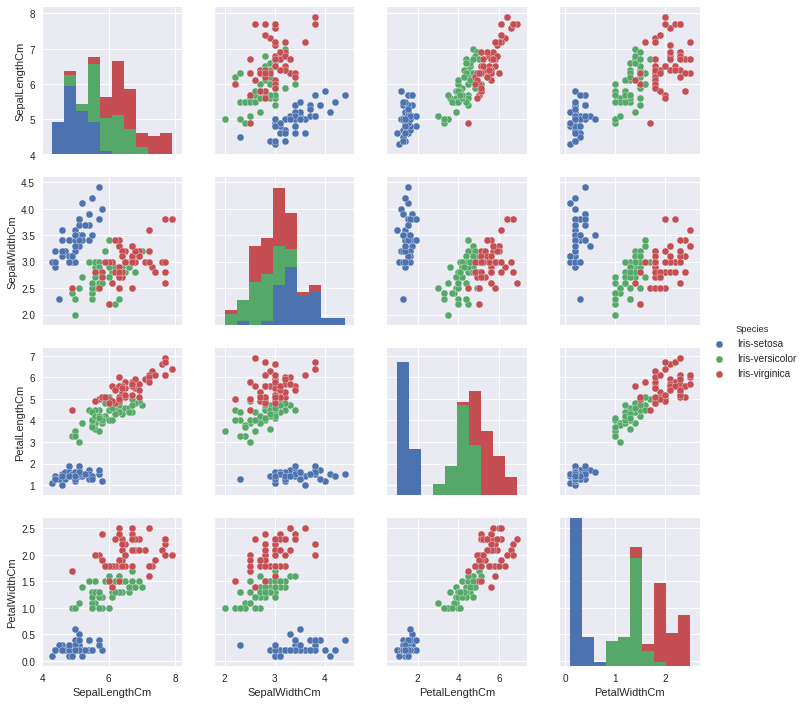

In [3]:
import seaborn as sns
smp = sns.pairplot(irisDF.toPandas(),hue="Species",diag_kind='hist')

# Multivariate descriptive statistics
---

#### Mean vector

For the j-th column of the data matrix, the sample mean of the values $\{x_{1j},...,x_{nj}\}$ is given by $\bar{x_j}=\frac{1}{n}\sum_{i=1}^{n}x_{ij}$. If we assume that the sample is independent and identically distributed then the expected value $E[X_j]=\mu_j=E[\bar{x_j}]$ because $\bar{x_j}$ it's the unviased estimator of $\mu_j$. On the other hand we know of the multivariate distributions that if you have a random vector $\vec{X}$ of dimension p, then its expected value is given by:

$$
\begin{align*}
\vec{\mu} = E[\vec{X}] & = (E[X_1],\dotsc,E[X_j],\dotsc,E[X_p]) \\
& = (E[\bar{x_1}],\dotsc,E[\bar{x_j}],\dotsc,E[\bar{x_j}]) \\
& = E[(\bar{x_1},\dots,\bar{x_j},\dotsc,\bar{x_p})]\\
& = E\left[\left(\frac{1}{n}\sum_{i=1}^{n}x_{i1},\dots,\frac{1}{n}\sum_{i=1}^{n}x_{ij},\dotsc,\frac{1}{n}\sum_{i=1}^{n}x_{ip}\right)\right]\\
& = E\left[\frac{1}{n} \left(\sum_{i=1}^{n}x_{i1},\dots,\sum_{i=1}^{n}x_{ij},\dotsc,\sum_{i=1}^{n}x_{ip}\right)\right]\\
& = E\left[\frac{1}{n} \sum_{i=1}^{n} \left(x_{i1},\dots,x_{ij},\dotsc,x_{ip}\right)\right]\\
\vec{\mu} & = E\left[\frac{1}{n} \sum_{i=1}^{n} \textbf{x}_i\right]\\
\end{align*}
$$

Which means that $\frac{1}{n} \sum_{i=1}^{n} \textbf{x}_i$ denoted by $\bar{\textbf{x}}$ is the unbiased estimator for the expected value $\vec{\mu}$ of the random vector $\vec{X}$ and is called **sample mean vector**.

#### Covariance matrix

Similarly to the univariate case, it is possible to generalize the definition of variance for a random vector of dimension p (in terms of a grammian matrix) as follows:

$$
\begin{align*}
\Sigma_{p \times p} & = E \left[ (\vec{\textbf{X}}-\vec{\mu})(\vec{\textbf{X}}-\vec{\mu})^T  \right]\\
& = E \left[ 
    \left( \begin{array}{c}
    X_1 - \mu_1 \\
    \vdots  \\
    x_p - \mu_p \end{array} \right)
    \left(X_a - \mu_1,\dotsc,X_p-\mu_p \right)
\right] \\
& = E \left[ \begin{array}{ccccc}
(X_1-\mu_1)(X_1-\mu_1) & \cdots & (X_1-\mu_1)(X_j-\mu_j) & \cdots & (X_1-\mu_1)(X_p-\mu_p) \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
(X_i-\mu_i)(X_1-\mu_1) & \cdots & (X_i-\mu_i)(X_j-\mu_j) & \cdots & (X_i-\mu_i)(X_p-\mu_p) \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
(X_p-\mu_p)(X_1-\mu_1) & \cdots & (X_p-\mu_p)(X_j-\mu_j) & \cdots & (X_p-\mu_p)(X_p-\mu_p) \end{array} \right]\\
& = \left[ \begin{array}{ccccc}
E[(X_1-\mu_1)(X_1-\mu_1)] & \cdots & E[(X_1-\mu_1)(X_j-\mu_j)] & \cdots & E[(X_1-\mu_1)(X_p-\mu_p)] \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
E[(X_i-\mu_i)(X_1-\mu_1)] & \cdots & E[(X_i-\mu_i)(X_j-\mu_j)] & \cdots & E[(X_i-\mu_i)(X_p-\mu_p)] \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
E[(X_p-\mu_p)(X_1-\mu_1)] & \cdots & E[(X_p-\mu_p)(X_j-\mu_j)] & \cdots & E[(X_p-\mu_p)(X_p-\mu_p)] 
\end{array} \right]\\
& = \left[ \begin{array}{ccccc}
Cov(X_1,X_1) & \cdots & Cov(X_1,X_j) & \cdots & Cov(X_1,X_p)\\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
Cov(X_i,X_1)& \cdots & Cov(X_i,X_1) & \cdots & Cov(X_i,X_p) \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
Cov(X_p,X_1) & \cdots & Cov(X_p,X_j) & \cdots & Cov(X_p,X_p) 
\end{array} \right]\\
\Sigma_{p \times p} & = \left[ \begin{array}{ccccc}
\sigma_{11} & \cdots & \sigma_{1j} & \cdots & \sigma_{1p} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
\sigma_{i1} & \cdots & \sigma_{ij} & \cdots & \sigma_{ip} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
\sigma_{p1} & \cdots & \sigma_{pj} & \cdots & \sigma_{pp} 
\end{array} \right]\\
\end{align*}
$$

Although $E\left[s_{ij} \right] = E\left[\frac{1}{n} \sum_{k=0}^n (x_{ik}-\bar{x}_i)(x_{kj}-\bar{x}_j) \right] = \sigma_{ij} - E\left[(\bar{x}_i-\mu_i)(\bar{x}_j - \mu_j)\right] \neq \sigma_{ij}$, i.e. $s_{ij}$ it's a biased of $\sigma_{i,j}$, $s_{ij}$ satisfy the property of being asymptotically unbiased estimator, because $\lim_{n\to\infty} \sigma_{ij} - E\left[(\bar{x}_i-\mu_i)(\bar{x}_j - \mu_j)\right] = \sigma_{ij}$ due to the fact $E\left[(\bar{x}_i-\mu_i)(\bar{x}_j - \mu_j)\right] \rightarrow 0$ (The law of large numbers). Then the covariance matrix could be aproximated asymptotically using sample covariances.

$$
\begin{align*}
\Sigma_{p \times p} & = 
\left[ \begin{array}{ccccc}
\sigma_{11} & \cdots & \sigma_{1j} & \cdots & \sigma_{1p} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
\sigma_{i1} & \cdots & \sigma_{ij} & \cdots & \sigma_{ip} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
\sigma_{p1} & \cdots & \sigma_{pj} & \cdots & \sigma_{pp} 
\end{array} \right] 
& \approx	 
\left[ \begin{array}{ccccc}
s_{11} & \cdots & s_{1j} & \cdots & s_{1p} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
s_{i1} & \cdots & s_{ij} & \cdots & s_{ip} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
s_{p1} & \cdots & s_{pj} & \cdots & s_{pp} 
\end{array} \right]
& = \textbf{S}_{p \times p}
\\
\end{align*}
$$

#### Correlation matrix (depende measure)

The most familiar measure of dependence between two quantities is the Pearson product-moment correlation coefficient, or **Pearson's correlation coefficient**, commonly called simply **the correlation coefficient**. It is obtained by dividing the covariance of the two variables by the product of their standard deviations, this measure could be approximated using the covariance sample.

$$
\rho_{X_i,X_j} = \frac{Cov(X_i,X_j)}{\sqrt{Cov(X_i,X_i)Cov(X_j,X_j)}} \approx \frac{s_{ij}}{\sqrt{s_{ii}}\sqrt{s_{jj}}} = r_{ij} 
$$

It's possible approximate the correlation matrix

$$
\begin{align*}
\textbf{P}_{p \times p} & = 
\left[ \begin{array}{ccccc}
1 & \cdots & \rho_{1j} & \cdots & \rho_{1p} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
\rho_{i1} & \cdots & 1 & \cdots & \rho_{ip} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
\rho_{p1} & \cdots & \rho_{pj} & \cdots & 1 
\end{array} \right] 
& \approx	 
\left[ \begin{array}{ccccc}
1 & \cdots & r_{1j} & \cdots & r_{1p} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
r_{i1} & \cdots & 1 & \cdots & r_{ip} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
r_{p1} & \cdots & r_{pj} & \cdots & 1 
\end{array} \right]
& = \textbf{R}_{p \times p}
\\
\end{align*}
$$

**Example 1.1 - 3 [Computing multivariate statistics with spark]**

In [4]:
from pyspark.mllib.linalg.distributed import RowMatrix
from pyspark.ml.linalg import Vectors
from pyspark.mllib.stat import Statistics

covariance = RowMatrix(irisDF.rdd.map(lambda r: [r[0:4]])).computeCovariance().toArray()
correlation = Statistics.corr(irisDF.rdd.map(lambda r: [r[0:4]])) 

print("Covariance matrix:\n"+str(covariance))
print("Correlation matrix:\n"+str(correlation))

Covariance matrix:
[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]
Correlation matrix:
[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


#### Multivariate descriptive statistics as matrix operations
---

if $\textbf{1}_{1 \times n}$ is a vector of 1's, then:

$$
\left[1_1, \dotsc, 1_i, \dotsc, 1_n \right]
\left[ \begin{array}{ccccc}
x_{1 1} & \cdots & x_{1 j} & \cdots & x_{1 p} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
x_{i 1} & \cdots & x_{i j} & \cdots & x_{i p} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
x_{n 1} & \cdots & x_{n j} & \cdots & x_{n p} \end{array} \right]
= \left[\sum_{i=0}^n x_{i1}, \dotsc, \sum_{i=0}^n x_{ij}, \dotsc, \sum_{i=0}^n x_{ip} \right]
\implies
\bar{\textbf{x}} = \frac{1}{n} [\textbf{1}_{1 \times n}] \textbf{X}. 
$$
Consider the following matrix opertions:

$$
\textbf{1}_{n \times 1}\bar{\textbf{x}} = 
\left[ \begin{array}{ccccc}
\bar{x}_{1} & \cdots & \bar{x}_{2} & \cdots & \bar{x}_{p} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
\bar{x}_{1} & \cdots & \bar{x}_{2} & \cdots & \bar{x}_{p} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
\bar{x}_{1} & \cdots & \bar{x}_{2} & \cdots & \bar{x}_{p} \\
\end{array} \right]
= \frac{1}{n} \textbf{1}_{n \times 1} [\textbf{1}_{1 \times n}] \textbf{X}_{n \times p}
$$

It defines the residual matrix (**Data centered matrix**) as follows:

$$
\left[ \begin{array}{ccccc}
x_{11}-\bar{x}_{1} & \cdots & x_{1j}-\bar{x}_{2} & \cdots & x_{1p}-\bar{x}_{p} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
x_{i1}-\bar{x}_{1} & \cdots & x_{ij}-\bar{x}_{2} & \cdots & x_{ip}-\bar{x}_{p} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
x_{n1}-\bar{x}_{1} & \cdots & x_{nj}-\bar{x}_{2} & \cdots & x_{np}-\bar{x}_{p} 
\end{array} \right]
=\textbf{X}-\frac{1}{n} \textbf{1}_{n \times 1} [\textbf{1}_{1 \times n}]\textbf{X}
=\left(\textbf{I}-\frac{1}{n}\textbf{1}_{n \times 1} [\textbf{1}_{1 \times n}] \right)\textbf{X} 
=\textbf{HX}
$$

Where $\textbf{H}=\textbf{I}-\frac{1}{n}\textbf{1}_{n \times 1} [\textbf{1}_{1 \times n}]$ this matrix it's known as centering matrix and has the following properties:

* It's symmetric positive semi-definite.
* It's idempotent, so that. Once the mean has been removed, it is zero and removing it again has no effect.
* It's singular. The effects of applying the transformation cannot be reversed.
* It has the eigenvalue 1 of multiplicity n − 1 and eigenvalue 0 of multiplicity 1.
* It has a nullspace of dimension 1.
* It's a projection matrix of $\mathbf{X}$, onto the (n−1)-dimensional subspace that is orthogonal to the nullspace.

It's possible write $\textbf{S}$ in terms of $\textbf{X}$ and $\textbf{H}$ using the last properties.

$$
\begin{align*}
\textbf{S}_{p \times p}
& = \left[ \begin{array}{ccccc}
s_{11} & \cdots & s_{1j} & \cdots & s_{1p} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
s_{i1} & \cdots & s_{ij} & \cdots & s_{ip} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
s_{p1} & \cdots & s_{pj} & \cdots & s_{pp} 
\end{array} \right] \\ \\
& = \left[ \begin{array}{ccccc}
\frac{1}{n}\sum_{k=0}^{n} (x_{1k}-\bar{x}_1)(x_{k1}-\bar{x}_1) & \cdots & \frac{1}{n}\sum_{k=0}^{n} (x_{1k}-\bar{x}_1)(x_{kj}-\bar{x}_j)  & \cdots & \frac{1}{n}\sum_{k=0}^{n} (x_{1k}-\bar{x}_1)(x_{kp}-\bar{x}_p) \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
\frac{1}{n}\sum_{k=0}^{n} (x_{ik}-\bar{x}_i)(x_{k1}-\bar{x}_1) & \cdots & \frac{1}{n}\sum_{k=0}^{n} (x_{ik}-\bar{x}_i)(x_{kj}-\bar{x}_j)  & \cdots & \frac{1}{n}\sum_{k=0}^{n} (x_{ik}-\bar{x}_i)(x_{kp}-\bar{x}_p)  \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
\frac{1}{n}\sum_{k=0}^{n} (x_{pk}-\bar{x}_p)(x_{k1}-\bar{x}_1) & \cdots & \frac{1}{n}\sum_{k=0}^{n} (x_{pk}-\bar{x}_p)(x_{kj}-\bar{x}_j)  & \cdots & \frac{1}{n}\sum_{k=0}^{n} (x_{pk}-\bar{x}_p)(x_{kp}-\bar{x}_p)  
\end{array} \right] \\ \\
& = \frac{1}{n} \left[ \begin{array}{ccccc}
x_{11}-\bar{x}_{1} & \cdots &  x_{i1}-\bar{x}_{1} & \cdots & x_{n1}-\bar{x}_{1}\\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
 x_{1j}-\bar{x}_{2} & \cdots & x_{ij}-\bar{x}_{2} & \cdots &  x_{nj}-\bar{x}_{2} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
x_{1p}-\bar{x}_{p} & \cdots & x_{ip}-\bar{x}_{p} & \cdots & x_{np}-\bar{x}_{p} 
\end{array} \right]
\left[ \begin{array}{ccccc}
x_{11}-\bar{x}_{1} & \cdots & x_{1j}-\bar{x}_{2} & \cdots & x_{1p}-\bar{x}_{p} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
x_{i1}-\bar{x}_{1} & \cdots & x_{ij}-\bar{x}_{2} & \cdots & x_{ip}-\bar{x}_{p} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
x_{n1}-\bar{x}_{1} & \cdots & x_{nj}-\bar{x}_{2} & \cdots & x_{np}-\bar{x}_{p} 
\end{array} \right] \\ \\
& = \frac{1}{n} (\textbf{HX})' \textbf{HX} = \frac{1}{n} \textbf{X'H'HX} = \frac{1}{n} \textbf{X'HHX}\\
\textbf{S} & = \frac{1}{n} \textbf{X'HX}\\
\end{align*}
$$

Consider the diagonal matrix $\textbf{D}^{1/2}$ (**sample standar deviation matrix**) and its inverse $\textbf{D}^{1/2}$  defined as:

$$
\textbf{D}^{1/2}=
\left[ \begin{array}{ccccc}
\sqrt{s_{11}} & \cdots &0 & \cdots & 0 \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
0 & \cdots & \sqrt{s_{jj}} & \cdots & 0 \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
0 & \cdots & 0 & \cdots &\sqrt{s_{pp}}
\end{array} \right]
\thinspace
\textbf{D}^{-1/2}=
\left[ \begin{array}{ccccc}
\frac{1}{\sqrt{s_{11}}} & \cdots &0 & \cdots & 0 \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
0 & \cdots & \frac{1}{\sqrt{s_{jj}}} & \cdots & 0 \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
0 & \cdots & 0 & \cdots &\frac{1}{\sqrt{s_{pp}}}
\end{array} \right] \\
$$

Then $\textbf{R}$ couuld be writen as:

$$
\begin{align*}
\textbf{R}_{p \times p}
& = \left[ \begin{array}{ccccc}
1 & \cdots & r_{1j} & \cdots & r_{1p} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
r_{i1} & \cdots & 1 & \cdots & r_{ip} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
r_{p1} & \cdots & r_{pj} & \cdots & 1 
\end{array} \right] \\ \\
& = \left[ \begin{array}{ccccc}
\frac{s_{ij}}{\sqrt{s_{ii}}\sqrt{s_{jj}}} & \cdots & \frac{s_{ij}}{\sqrt{s_{ii}}\sqrt{s_{jj}}} & \cdots & \frac{s_{ij}}{\sqrt{s_{ii}}\sqrt{s_{jj}}} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
\frac{s_{ij}}{\sqrt{s_{ii}}\sqrt{s_{jj}}} & \cdots & \frac{s_{ij}}{\sqrt{s_{ii}}\sqrt{s_{jj}}} & \cdots & \frac{s_{ij}}{\sqrt{s_{ii}}\sqrt{s_{jj}}} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
\frac{s_{ij}}{\sqrt{s_{ii}}\sqrt{s_{jj}}} & \cdots & \frac{s_{ij}}{\sqrt{s_{ii}}\sqrt{s_{jj}}} & \cdots & \frac{s_{ij}}{\sqrt{s_{ii}}\sqrt{s_{jj}}} 
\end{array} \right] \\ \\
& =
\left[ \begin{array}{ccccc}
\frac{1}{\sqrt{s_{11}}} & \cdots &0 & \cdots & 0 \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
0 & \cdots & \frac{1}{\sqrt{s_{jj}}} & \cdots & 0 \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
0 & \cdots & 0 & \cdots &\frac{1}{\sqrt{s_{pp}}}
\end{array} \right]
\left[ \begin{array}{ccccc}
s_{11} & \cdots & s_{1j} & \cdots & s_{1p} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
s_{i1} & \cdots & s_{ij} & \cdots & s_{ip} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
s_{p1} & \cdots & s_{pj} & \cdots & s_{pp} 
\end{array} \right]
\left[ \begin{array}{ccccc}
\frac{1}{\sqrt{s_{11}}} & \cdots &0 & \cdots & 0 \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
0 & \cdots & \frac{1}{\sqrt{s_{jj}}} & \cdots & 0 \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
0 & \cdots & 0 & \cdots &\frac{1}{\sqrt{s_{pp}}}
\end{array} \right] \\ \\
\textbf{R} & = \textbf{D}^{-1/2} \textbf{S} \textbf{D}^{-1/2}
\end{align*}
$$

**Example 1.1 - 4 [Centering data sets with spark]**

Although matrix expressions help to obtain useful theoretical results are too expensive to implement them computationally, it is preferable to use methods based on relational algebra to obtain descriptive statistics.

In [5]:
irisMeansDF = irisDF.groupBy('Species').mean()
irisMeansDF.toPandas()

,Species,avg(SepalLengthCm),avg(SepalWidthCm),avg(PetalLengthCm),avg(PetalWidthCm)
0,Iris-virginica,6.588,2.974,5.552,2.026
1,Iris-setosa,5.006,3.418,1.464,0.244
2,Iris-versicolor,5.936,2.770,4.260,1.326


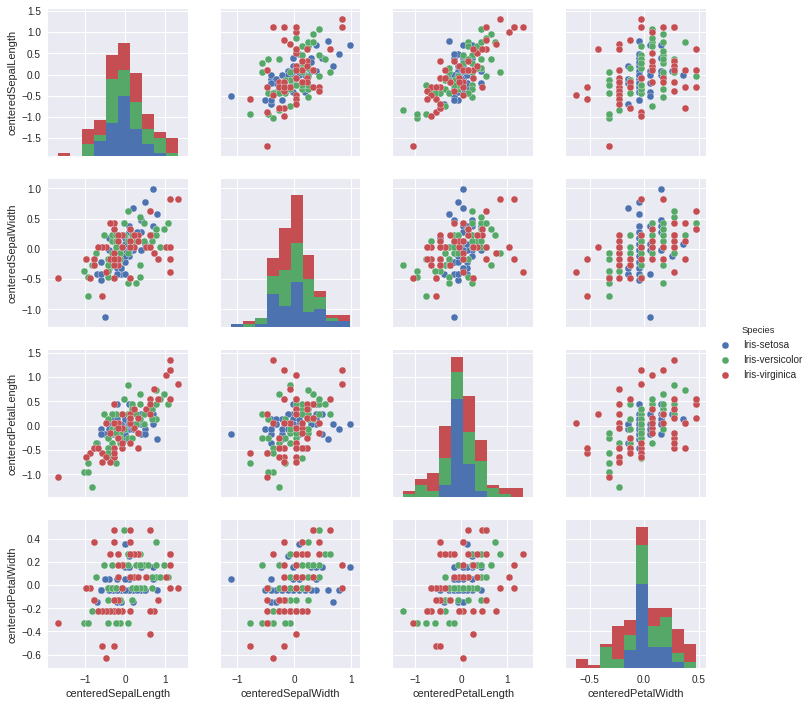

In [6]:
import pyspark.sql.functions as f
from pyspark.sql.functions import col as c
centeredIrisDF=irisDF.join(irisMeansDF,on='Species')\
               .select((c('SepalLengthCm')-c('avg(SepalLengthCm)'))\
                       .alias('centeredSepalLength'),\
                       (c('SepalWidthCm')-c('avg(SepalWidthCm)'))\
                       .alias('centeredSepalWidth'),\
                       (c('PetalLengthCm')-c('avg(PetalLengthCm)'))\
                       .alias('centeredPetalLength'),\
                       (c('PetalWidthCm')-c('avg(PetalWidthCm)'))\
                       .alias('centeredPetalWidth'),\
                       c('Species'))
smpCentered = sns.pairplot(centeredIrisDF.toPandas(),hue="Species",diag_kind='hist')

#### References:
* "Multivariate Statistics", John I. Marden, Department of Statistics, University of Illinois at Urbana-Champaign.
* "Nuevos Métodos de Análisis Multivariante", Carles M. Cuadras, c C. M. Cuadras, CMC Editions, Manacor 30, 08023 Barcelona, Spain.
* "Applied Multivariate Statistical Analysis", PennState university, online course STAT 505, (https://onlinecourses.science.psu.edu/stat505/)